#DAT405 Introduction to Data Science and AI 
##2022-2023, Reading Period 1
## Assignment 4: Spam classification using Naïve Bayes 
### Muyao Dai -- 9 hours
### Jinming Wei -- 8 hours
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.



In [13]:
#Download and extract data
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2

--2022-09-27 19:06:00--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677144 (1.6M) [application/x-bzip2]
Saving to: ‘20021010_easy_ham.tar.bz2.2’

20021010_easy_ham.t 100%[===================>]   1.60M  --.-KB/s    in 0.02s   

2022-09-27 19:06:00 (64.8 MB/s) - ‘20021010_easy_ham.tar.bz2.2’ saved [1677144/1677144]

--2022-09-27 19:06:00--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021126 (997K) [application/x-bzip2]
Saving to: ‘20021010_har

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

###1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 
2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)


In [27]:
#pre-processing code here
# !ls -lah
import os, sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

ROOT_DIR = '/content/' 

# for directories, subdirs, files in os.walk(ROOT_DIR):
#     print (directories, subdirs,len(files))

easy_ham_path = '/content/easy_ham' 
hard_ham_path = '/content/hard_ham'
spam_path = '/content/spam'

easy_ham_list = []
hard_ham_list = []
spam_list = []
count, easy_ham_count , hard_ham_count = 0, 0, 0

for directories, subdirs, files in os.walk(ROOT_DIR):
    if (directories  == easy_ham_path):
        for filename in files:  
            try:
                with open(os.path.join(directories, filename)) as f:
                    data = f.read()
                    easy_ham_list.append(data)
                    f.close()
            except:
                easy_ham_count += 1           
    if (directories  == hard_ham_path):
        for filename in files:  
            try:
                with open(os.path.join(directories, filename)) as f:
                    data = f.read()
                    hard_ham_list.append(data)
            except:
                hard_ham_count += 1
    if (directories  == spam_path):
        for filename in files:
            try:
                with open(os.path.join(directories, filename)) as f:
                    data = f.read()
                    spam_list.append(data)
            except:
                count+=1

print("Easy Ham Occurences: ", len(easy_ham_list))
print("Ommitted from Easy Ham: ", easy_ham_count)
print("Hard Ham Occurences: ", len(hard_ham_list))
print("Ommitted from Hard Ham: ", hard_ham_count)
print("Spam Occurences: ", len(spam_list))
print("Ommitted from Spam: ", count)


df_easy = pd.DataFrame()
df_hard = pd.DataFrame()
df_spam = pd.DataFrame()
df_easy['text'] = pd.DataFrame(easy_ham_list)
df_easy['label'] = 'easy ham'
df_hard['text'] = pd.DataFrame(hard_ham_list)
df_hard['label'] = 'hard ham'
df_spam['text'] = pd.DataFrame(spam_list)
df_spam['label'] = 'spam'

df = pd.concat([df_easy, df_hard, df_spam])
df['numeric label'] = df.label.map({'easy ham':0, 'hard ham':0, 'spam':1})

ham = df[df['numeric label'] != 1]
spam = df[df['numeric label'] == 1]
easy_spam = df[df['label'] != 'hard ham']
hard_spam = df[df['label'] != 'easy ham']

hamtrain, hamtest, y1_train, y1_test = train_test_split(ham['text'], ham['numeric label'], test_size=0.2, random_state=42)
spamtrain, spamtest, y2_train, y2_test = train_test_split(spam['text'], spam['numeric label'], test_size=0.2, random_state=42)

Easy Ham Occurences:  2410
Ommitted from Easy Ham:  141
Hard Ham Occurences:  221
Ommitted from Hard Ham:  29
Spam Occurences:  418
Ommitted from Spam:  83


Your discussion here

In preprocessing, we first scanned data files to extract 'easy ham', 'hard ham' and 'spam' and then stored them using lists. The we used pandas to build DataFrame accordingly with 3 columns: text, label and numeric label. Afterwards, we used 'train_test_split' imported from sklearn to split data set. In this experiment, we set test_size equal to 0.2. 

###2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





In [23]:
#Code here
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt


X_train = pd.concat([hamtrain, spamtrain])
Y_train = pd.concat([y1_train, y2_train])
X_test = pd.concat([hamtest, spamtest])
Y_test = pd.concat([y1_test, y2_test])

cv = CountVectorizer()
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

def naive_bayes(x, y, x_test, y_test, Print=True):
  dic = {}
  mnb = MultinomialNB()
  mnb.fit(x, y)
  s1 = mnb.score(x_test.toarray(), y_test)
  s2 = accuracy_score(y_test, mnb.predict(x_test.toarray()))
  dic['Multinomial Score'] = s1
  dic['Multinomial Accuracy Score'] = s2
  tpr1 = recall_score(y_test, mnb.predict(x_test.toarray()))
  dic['Multinomial True Positive Rate(Recall Score)'] = tpr1
  dic['Multinomial False Negative Rate'] = 1-tpr1

  bnb = BernoulliNB()
  bnb.fit(x.toarray(), y)
  s3 = bnb.score(x_test.toarray(), y_test)
  s4 = accuracy_score(y_test, bnb.predict(x_test.toarray()))
  dic['Bernoulli Score'] = s3
  dic['Bernoulli Accuracy Score'] = s4
  tpr2 = recall_score(y_test, bnb.predict(x_test.toarray()))
  dic['Bernoulli True Positive Rate(Recall Score)'] = tpr2
  dic['Bernoulli False Negative Rate'] = 1-tpr2

  cm_mul = confusion_matrix(y_test, mnb.predict(x_test.toarray()))
  cm_ber = confusion_matrix(y_test, bnb.predict(x_test.toarray()))

  if Print:
    for key, value in dic.items():
      print(key + ":" + '%.8f'%value)
  
  return cm_mul, cm_ber

print('----------------')
naive_bayes(X_train, Y_train, X_test, Y_test)



----------------
Multinomial Score:0.97545008
Multinomial Accuracy Score:0.97545008
Multinomial True Positive Rate(Recall Score):0.86904762
Multinomial False Negative Rate:0.13095238
Bernoulli Score:0.89852700
Bernoulli Accuracy Score:0.89852700
Bernoulli True Positive Rate(Recall Score):0.29761905
Bernoulli False Negative Rate:0.70238095


(array([[523,   4],
        [ 11,  73]]), array([[524,   3],
        [ 59,  25]]))

Your discussion here

In training and evaluating a Naïve Bayes classifier, we firstly imported needed packages like 'MultinomialNB', BernoulliNB', 'CountVectorizer', 'confusion_matrix', 'f1_score', 'precision_score', 'recall_score' and 'accuracy_score' from sklearn. Then we used 'CountVectorizer' to transform the extracted data into vectors. Then we built 2 types of Naïve Bayes classifiers, Multinomial Naive Bayes and Bernoulli Naive Bayes. Afterwards, we evaluated our classifiers in their score, accuracy, true positive rate and false negative rate.

### 3.Run your program on 
-	Spam versus easy-ham 
-	Spam versus hard-ham.

In [46]:
#Code to report results here
easytrain, easytest, y3_train, y3_test = train_test_split(easy_spam['text'], 
                                                          easy_spam['numeric label'], 
                                                          test_size=0.2, 
                                                          random_state=21)
hardtrain, hardtest, y4_train, y4_test = train_test_split(hard_spam['text'], 
                                                          hard_spam['numeric label'], 
                                                          test_size=0.2, 
                                                          random_state=21)

# print(easytrain.shape, hardtrain.shape)
cv = CountVectorizer()
hardtrain = cv.fit_transform(hardtrain)
hardtest = cv.transform(hardtest)
easytrain = cv.fit_transform(easytrain)
easytest = cv.transform(easytest)

print('--------Spam versus easy-ham--------')
naive_bayes(easytrain, y3_train, easytest, y3_test)
print('--------Spam versus hard-ham--------')
naive_bayes(hardtrain, y4_train, hardtest, y4_test)



--------Spam versus easy-ham--------
Multinomial Score:0.98409894
Multinomial Accuracy Score:0.98409894
Multinomial True Positive Rate(Recall Score):0.88461538
Multinomial False Negative Rate:0.11538462
Bernoulli Score:0.94522968
Bernoulli Accuracy Score:0.94522968
Bernoulli True Positive Rate(Recall Score):0.60256410
Bernoulli False Negative Rate:0.39743590
--------Spam versus hard-ham--------
Multinomial Score:0.93750000
Multinomial Accuracy Score:0.93750000
Multinomial True Positive Rate(Recall Score):0.97619048
Multinomial False Negative Rate:0.02380952
Bernoulli Score:0.87500000
Bernoulli Accuracy Score:0.87500000
Bernoulli True Positive Rate(Recall Score):1.00000000
Bernoulli False Negative Rate:0.00000000


(array([[38,  6],
        [ 2, 82]]), array([[28, 16],
        [ 0, 84]]))

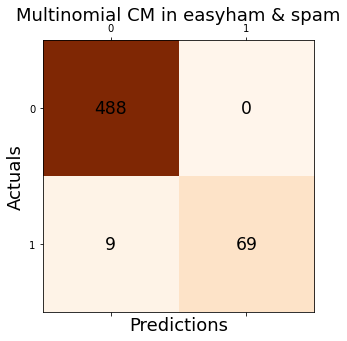

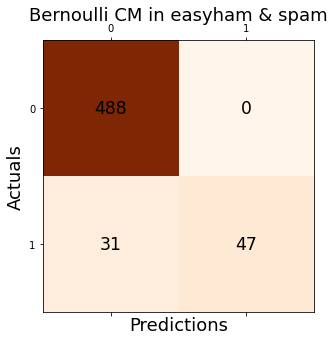

In [10]:
cm1, cm2 = naive_bayes(easytrain, y3_train, easytest, y3_test, Print=False)

# cmap=plt.cm.Oranges
def print_cm(cm, str):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(cm, cmap=plt.cm.Oranges)
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title(str, fontsize=18)
  plt.show()

print_cm(cm1, 'Multinomial CM in easyham & spam')
print_cm(cm2, 'Bernoulli CM in easyham & spam')

Your discussion here

We separately used 'Spam versus easy-ham' and 'Spam versus hard-ham' to train our Naïve Bayes classifiers and then evaluate them in all score, accuracy, true positive rate and false negative rate. It turns out that in both Multinomial Naive Bayes classifiers and Bernoulli Naive Bayes classifiers, the score and accuracy of 'Spam versus easy-ham' are higner than those of 'Spam versus hard-ham', while the true positive rate and false negative rate of 'Spam versus easy-ham' are lower than those of 'Spam versus hard-ham'. In both 'Spam versus easy-ham' and 'Spam versus hard-ham' data set, Multinomial Naive Bayes classifiers ranked highly in score and accuracy than Bernoulli Naive Bayes classifiers. When it comes to true positive rate and false negative rate, two types of classifiers performed differently in two data set.

###4.	To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

X_train = pd.concat([hamtrain, spamtrain])
Y_train = pd.concat([y1_train, y2_train])
X_test = pd.concat([hamtest, spamtest])
Y_test = pd.concat([y1_test, y2_test])

cv = CountVectorizer(stop_words="english")
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

naive_bayes(X_train, Y_train, X_test, Y_test)


easytrain, easytest, y3_train, y3_test = train_test_split(easy_spam['text'], 
                                                          easy_spam['numeric label'], 
                                                          test_size=0.2, 
                                                          random_state=21)
hardtrain, hardtest, y4_train, y4_test = train_test_split(hard_spam['text'], 
                                                          hard_spam['numeric label'], 
                                                          test_size=0.2, 
                                                          random_state=21)

hardtrain = cv.fit_transform(hardtrain)
hardtest = cv.transform(hardtest)
easytrain = cv.fit_transform(easytrain)
easytest = cv.transform(easytest)

print('--------Spam versus easy-ham--------')
naive_bayes(easytrain, y3_train, easytest, y3_test)
print('--------Spam versus hard-ham--------')
naive_bayes(hardtrain, y4_train, hardtest, y4_test)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Multinomial Score:0.97545008
Multinomial Accuracy Score:0.97545008
Multinomial True Positive Rate(Recall Score):0.86904762
Multinomial False Negative Rate:0.13095238
Bernoulli Score:0.89852700
Bernoulli Accuracy Score:0.89852700
Bernoulli True Positive Rate(Recall Score):0.28571429
Bernoulli False Negative Rate:0.71428571
--------Spam versus easy-ham--------
Multinomial Score:0.98409894
Multinomial Accuracy Score:0.98409894
Multinomial True Positive Rate(Recall Score):0.88461538
Multinomial False Negative Rate:0.11538462
Bernoulli Score:0.93639576
Bernoulli Accuracy Score:0.93639576
Bernoulli True Positive Rate(Recall Score):0.53846154
Bernoulli False Negative Rate:0.46153846
--------Spam versus hard-ham--------
Multinomial Score:0.93750000
Multinomial Accuracy Score:0.93750000
Multinomial True Positive Rate(Recall Score):0.97619048
Multinomial False Negative Rate:0.02380952
Bernoulli Score:0.88281250
Bernoulli Accuracy Score:0.88281250
Bernoulli True Positive Rate(Recall Score):1.0000

(array([[38,  6],
        [ 2, 82]]), array([[29, 15],
        [ 0, 84]]))

Your discussion here

a) Common and uninformative words are usually filtered in NLP processing. Filtering stopwords may help to save storage space and improve search efficiency. And in this section, we used the stopwords offered by sklearn.

b) We used the parameters in Sklearn’s CountVectorizer to filter out these words and rerun the experiment using filtered data. It turns out that filtered data performs higher score and accuracy in Bernoulli Naive Bayes classifier on data set 'spam versus hard-ham', lower score , acccuracy and true positive rate in Bernoulli Naive Bayes classifier on data set 'spam versus easy-ham', higher false negative rate in Bernoulli Naive Bayes classifier on data set 'spam versus easy-ham'. In conclusion, filtering stopwords makes Bernoulli Naive Bayes classifier performs better on data set 'spam versus hard-ham' and worse on data set 'spam versus easy-harm'. According to this experiment, filtering stopwords may help and may on the contrary way. 

###5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
-	Does the result improve from 3 and 4? 
- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
- How does this alter the predictions? Discuss why or why not.

--------Spam versus easy-ham--------
Multinomial Score:0.98763251
Multinomial Accuracy Score:0.98763251
Multinomial True Positive Rate(Recall Score):0.97435897
Multinomial False Negative Rate:0.02564103
Bernoulli Score:0.95936396
Bernoulli Accuracy Score:0.95936396
Bernoulli True Positive Rate(Recall Score):0.85897436
Bernoulli False Negative Rate:0.14102564


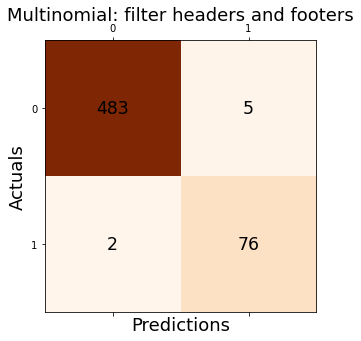

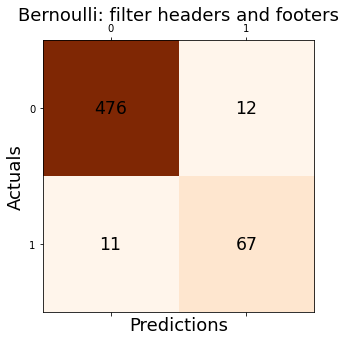

--------Spam versus hard-ham--------
Multinomial Score:0.96093750
Multinomial Accuracy Score:0.96093750
Multinomial True Positive Rate(Recall Score):0.98809524
Multinomial False Negative Rate:0.01190476
Bernoulli Score:0.95312500
Bernoulli Accuracy Score:0.95312500
Bernoulli True Positive Rate(Recall Score):0.97619048
Bernoulli False Negative Rate:0.02380952


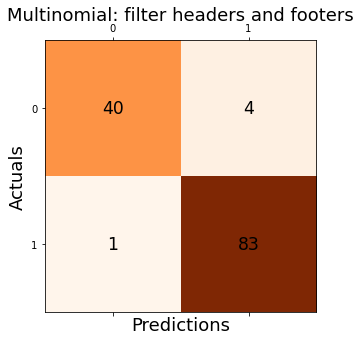

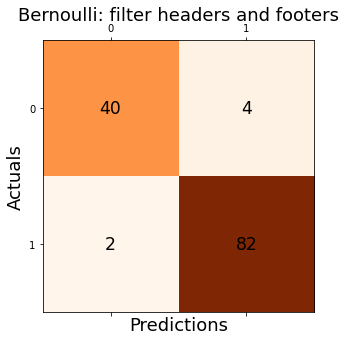

In [11]:
df['length'] = df['text'].map(lambda text: len(text))

# filter out the headers and footers
import re

def cleaning(word):
    # remove email
    word = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", word)
    # remove url
    # word = re.sub(r"http\S+", "", word)
    # word = word.lower()
    # word = word.split('Content-Transfer-Encoding:', 1)[-1] 
    word = word.split('X-Spam-Level:', 1)[-1]
    word = word.split('--', 1)[0] 
    # word = re.sub(r'\n', "", word)
    # word = re.sub(r'>', "", word)
    return  word

df['message'] = [cleaning(o) for o in df['text']]
df['length2'] = df['message'].map(lambda message: len(message))
# pd.set_option('max_colwidth',10000)

easytrain1, easytest1, y3_train1, y3_test1 = train_test_split(df[df['label'] != 'hard ham']['message'], 
                                                              df[df['label'] != 'hard ham']['numeric label'], 
                                                              test_size=0.2, 
                                                              random_state=21)

hardtrain1, hardtest1, y4_train1, y4_test1 = train_test_split(df[df['label'] != 'easy ham']['message'], 
                                                              df[df['label'] != 'easy ham']['numeric label'], 
                                                              test_size=0.2, 
                                                              random_state=21)
cv = CountVectorizer()
easytrain1 = cv.fit_transform(easytrain1)
easytest1 = cv.transform(easytest1)
hardtrain1 = cv.fit_transform(hardtrain1)
hardtest1 = cv.transform(hardtest1)

print('--------Spam versus easy-ham--------')
cm1, cm2 = naive_bayes(easytrain1, y3_train1, easytest1, y3_test1)
print_cm(cm1, 'Multinomial: filter headers and footers')
print_cm(cm2, 'Bernoulli: filter headers and footers')

print('--------Spam versus hard-ham--------')
cm3, cm4 = naive_bayes(hardtrain1, y4_train1, hardtest1, y4_test1)

print_cm(cm3, 'Multinomial: filter headers and footers')
print_cm(cm4, 'Bernoulli: filter headers and footers')


Checking the whole dataset, I found lots of information like receivers, sender, date, and HTML label in front of the actual message seems redundant, and there seems to exist a pattern that that useless text ends with "X-Spam-Level:" or sometimes "Content-Transfer-Encoding:". Therefore, after removing the email and URL in the text, I tried to define the header of the email as the text before "X-Spam-Level:" and "Content-Transfer-Encoding:" and remove them.

\
When it comes to  footer, it is not that clear but double'-' seems to imply the end of the email content, so I define that as a footer.

\




1.   The result is improved partially and slightly from 3 and 4(Spam versus easy-ham, Multinomial Naive Bayes 98.2%->98.5%, Bernoulli Naive Bayes 92.6%->95.2%; Spam versus hard-ham, Multinomial Naive Bayes 95.31%=95.31%, Bernoulli Naive Bayes 89.8%->85.9%), it's reasonable to assume that the pre-processing doesn't work very well in data as it might delete some valuable information. 
\
Based on this assumption and observation in the original data, I decided to remain the URL link in the email content since it shows more frequently in spam emails. As a result, I found that both Multinomial and Bernoulli Naive Bayes is improved in hard and easy ham versus spam classification.
2.   The "train_test_split" method split datasets or into random train and test subsets, which is usually enough for cross validation, but in this spam classification analyse case, it is possible that unevenly more spam or ham email was distributed as test set and that will affect the conditional probability of certain words which might lead to false negative or false positive.
\
Based on analysis above, one way to avoid these very skewed results is set a ratio of each classes in train and test set instead of directly apply "train_test_split" method, so that we can make sure positive and negative data are evenly distributed.
3.  Since the most train data was spam email, the naive bayes algorithm might consider lots of "normal" words have larger possibility shows in spam email rather than ham email, when this classifier is used in test set, it is more likely to recognize ham email as spam which will lead to the decrease of the model score and True Positive Rate.








\







In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], 
                                                    df['numeric label'], 
                                                    test_size=0.2, 
                                                    random_state=21)
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

mnb = MultinomialNB(fit_prior = False)
mnb.fit(x_train, y_train) 
print(accuracy_score(y_test, mnb.predict(x_test.toarray())))


bnb = BernoulliNB(fit_prior = False)
bnb.fit(x_train, y_train) 
print(accuracy_score(y_test, bnb.predict(x_test.toarray())))

0.978688524590164
0.9737704918032787


What does this parameter mean?
How does this alter the predictions? Discuss why or why not.

1.   This parameter means that if we consider the prior possibility of our training set, the default value is True. To be more clear, if we don't enter manually through parameter "class_prior", naive bayes will compute the prior possibility based on our dataset, For example, 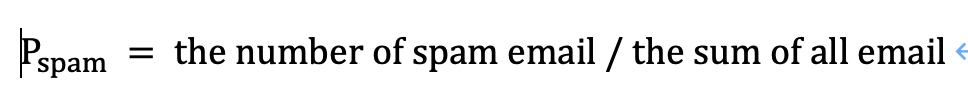.
2.   By setting fit_prior to false, we just consider each word that shows in a spam or ham email content as an independent event and ignore the possibility of the certain email is a spam. This should alter model's performance but by looking at the output, naive bayes still doing very well.
One possible explanation is that in spam detection, the vocabulary that spam used and the pattern it followed is relatively fixed, so even if we ignore the prior possibility, naive bayes is still able to recognize those spam emails.

